<a href="https://colab.research.google.com/github/hsy19y/-/blob/main/8%EC%A3%BC%EC%B0%A8_CNN_1~2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

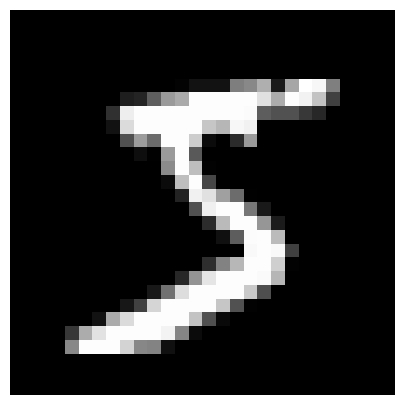

In [28]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid,  y_valid) = mnist.load_data()

def plot_image(data, idx):
    plt.figure(figsize = (5,5))
    plt.imshow(data[idx], cmap = 'gray')
    plt.axis('off')
    plt.show()
plot_image(x_train, 0)

In [29]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [30]:
##정규화 실시
x_train = x_train / x_train.max()
x_valid = x_valid / x_valid.max()
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [31]:
##마지막에 흑백 색상 채널추가
x_train_in = x_train[...,tf.newaxis]
x_valid_in = x_valid[...,tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [32]:
## Conv2D, kernel:3X3, name : 레이어 이름 conv, 활성화 함수: ReLU
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1),name = 'conv'),
      tf.keras.layers.MaxPool2D((2,2),name = 'pool'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2119 - accuracy: 0.9395 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0788 - accuracy: 0.9768 - val_loss: 0.0653 - val_accuracy: 0.9789
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0610 - accuracy: 0.9821 - val_loss: 0.0615 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0558 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0561 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0593 - val_accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0513 -

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9832


[0.05516265332698822, 0.9832000136375427]

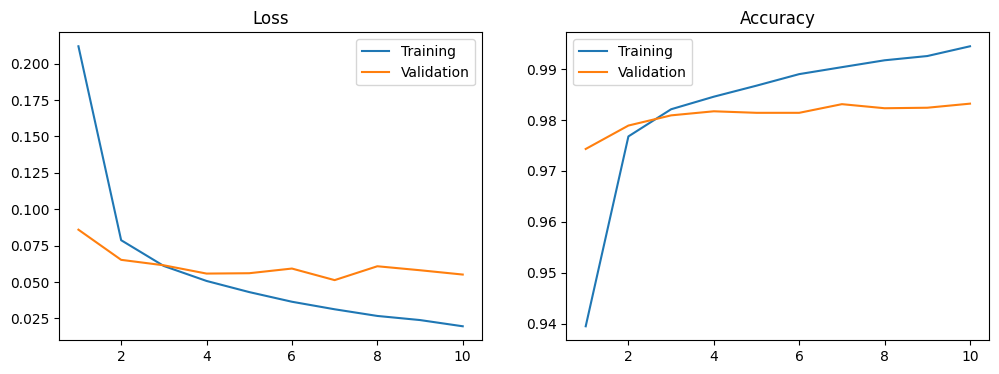

In [35]:
loss, val_loss = history.history['loss'],history.history['val_loss']
acc,val_acc = history.history['accuracy'],history.history['val_accuracy']
epoch = 10
fig,axes = plt.subplots(1,2,figsize = (12,4))
axes[0].plot(range(1, epoch +1),loss,label = 'Training')
axes[0].plot(range(1, epoch +1),val_loss,label = 'Validation')
axes[0].legend(loc = 'best')
axes[0].set_title('Loss')

axes[1].plot(range(1, epoch +1),acc,label = 'Training')
axes[1].plot(range(1, epoch +1),val_acc,label = 'Validation')
axes[1].legend(loc = 'best')
axes[1].set_title('Accuracy')

plt.show()

## 모델구조 파악
1. 입력형태 (28,28,1)
2. 출력형태 (10)
3. 첫번째 레이어 : 합성곱 Conv2D, 가중치(weight) (3,3,1,32) 3332 = 280개, 상수항 (bias) 32 / output (26,26,1,32)
4. 두번째 레이어 : Pooling (26,26,,32)
5. 세번째 레이어 : 1차 배열로 변환
6. 네번째 레이어 : 출력

In [36]:
##각 층에 대한 정보
model.layers

In [37]:
##첫번째 레이어 :Conv2D 가중치 : 3*3*32 = 280개
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.49271154, -0.87550646, -0.16372138, -0.64280796,
           -0.3649493 , -0.5236357 , -0.7332717 , -1.1552777 ,
            0.34310752,  0.2508399 , -0.08539864,  0.04950253,
           -0.46626595, -0.2857512 ,  0.3157969 ,  0.1977919 ,
           -0.7396895 , -0.7107938 ,  0.08553933,  0.42992452,
           -0.0370852 , -0.24171278,  0.19759557,  0.4084195 ,
           -0.30070305, -0.39805406,  0.16797735,  0.24865717,
            0.01470615, -0.19685408,  0.27265725, -0.14473224]],
 
         [[ 0.12104034, -0.6010662 , -0.5043466 , -0.09618324,
           -0.23694642, -0.1524089 , -0.01155595, -0.10664719,
           -0.24249445,  0.58842623,  0.01038552,  0.11530828,
           -0.27713478, -0.10306134,  0.39249167,  0.12271097,
           -1.5287809 , -1.1066946 ,  0.22058685,  0.545056  ,
            0.15177955, -0.13285403,  0.46330735, -0.19335319,
            0.23256594,  0.17140512,  0.33

In [38]:
##첫번째 레이어 (Conv2D 상수항) : 32개
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.16760956, -0.04138736, -0.17817187, -0.2956341 , -0.00905555,
       -0.16745329, -0.21316977, -0.06315622, -0.1760653 , -0.02915849,
       -0.17301026, -0.24865967, -0.06821624, -0.28490034, -0.19999848,
       -0.17154196,  0.11507364, -0.01184126, -0.2794111 ,  0.1430214 ,
       -0.23194243, -0.26843292, -0.0305691 , -0.06890913, -0.31908584,
       -0.04964576, -0.2549543 , -0.15697649, -0.23786075, -0.06228732,
       -0.24725637, -0.00618145], dtype=float32)>

In [39]:
#첫번째 레이어의 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.49271154, -0.87550646, -0.16372138, -0.64280796,
          -0.3649493 , -0.5236357 , -0.7332717 , -1.1552777 ,
           0.34310752,  0.2508399 , -0.08539864,  0.04950253,
          -0.46626595, -0.2857512 ,  0.3157969 ,  0.1977919 ,
          -0.7396895 , -0.7107938 ,  0.08553933,  0.42992452,
          -0.0370852 , -0.24171278,  0.19759557,  0.4084195 ,
          -0.30070305, -0.39805406,  0.16797735,  0.24865717,
           0.01470615, -0.19685408,  0.27265725, -0.14473224]],

        [[ 0.12104034, -0.6010662 , -0.5043466 , -0.09618324,
          -0.23694642, -0.1524089 , -0.01155595, -0.10664719,
          -0.24249445,  0.58842623,  0.01038552,  0.11530828,
          -0.27713478, -0.10306134,  0.39249167,  0.12271097,
          -1.5287809 , -1.1066946 ,  0.22058685,  0.545056  ,
           0.15177955, -0.13285403,  0.46330735, -0.19335319,
           0.23256594,  0.17140512,  0.33722937,  0.189401

In [40]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.16760956, -0.04138736, -0.17817187, -0.2956341 , -0.00905555,
       -0.16745329, -0.21316977, -0.06315622, -0.1760653 , -0.02915849,
       -0.17301026, -0.24865967, -0.06821624, -0.28490034, -0.19999848,
       -0.17154196,  0.11507364, -0.01184126, -0.2794111 ,  0.1430214 ,
       -0.23194243, -0.26843292, -0.0305691 , -0.06890913, -0.31908584,
       -0.04964576, -0.2549543 , -0.15697649, -0.23786075, -0.06228732,
       -0.24725637, -0.00618145], dtype=float32)>

In [41]:
##Conv2D 레이어 이름으로 소환하기
model.get_layer('conv')

In [42]:
##Conv2D와 Pooling 레이어의 output(이미지) 출력
##모델 만들기 : tf.keras.model(입력 = 입력 데이터, 출력 = 첫번째, 두번째 층의 출력)
##모델 예측 : 모델명.predict()
activator = tf.keras.Model(inputs = model.input,outputs = [layer.output for layer in model.layers[:2]] )

In [43]:
##입력데이터 첫번째 5에 대해 출력해보자
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)
##conv2D층과 Pooling층의 output 이므로 '2'라는 결과

1/1 [==============================] - 0s 64ms/step


2

In [44]:
##activation[0]
conv = activations[0]
conv.shape

(1, 26, 26, 32)

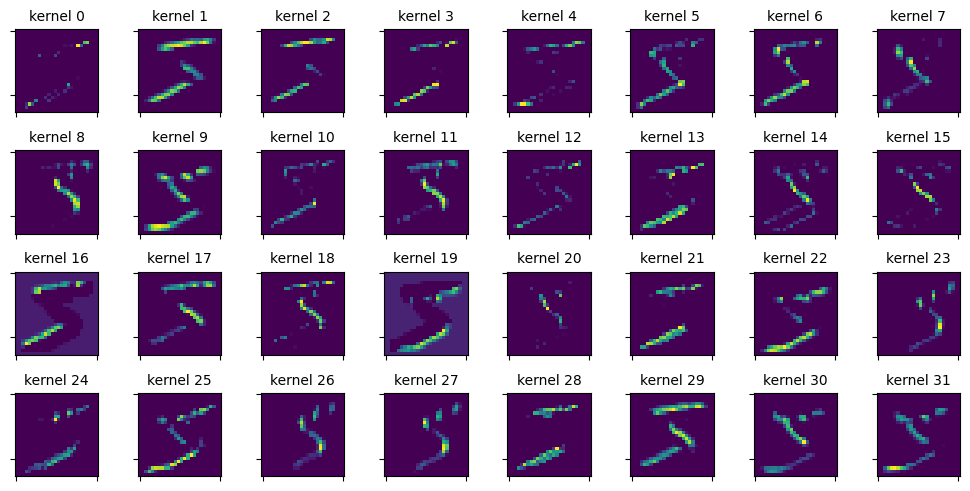

In [45]:
##'5'의 첫번째 Canv2D를 통과한 32개 kernel별 특성 맵 시각화
##Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
    ax = axes[i//8, i%8]
    ax.imshow(conv[0,:, :, i], cmap = 'viridis')
    ax.set_title('kernel %s'%str(i), fontsize = 10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible = False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible = False)

plt.tight_layout()
plt.show()  

In [46]:
##activations[1]
pooling = activations[1]
pooling.shape

(1, 13, 13, 32)

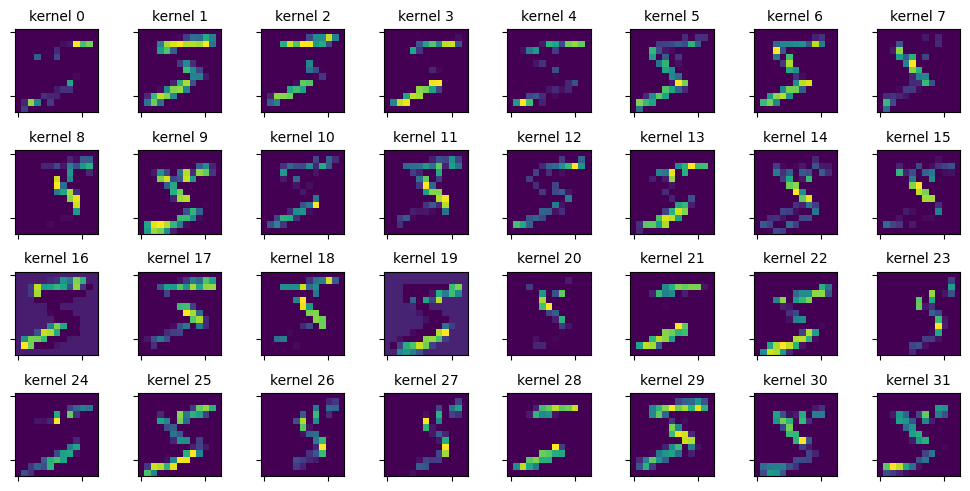

In [47]:
##'5'의 두번째 pooling를 통과한 32개 kernel별 특성맵 시각화
##pooling 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
    ax = axes[i//8, i%8]
    ax.imshow(pooling[0,:, :, i], cmap = 'viridis')
    ax.set_title('kernel %s'%str(i), fontsize = 10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible = False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible = False)

plt.tight_layout()
plt.show()  

In [4]:
import tensorflow_hub as tfhub

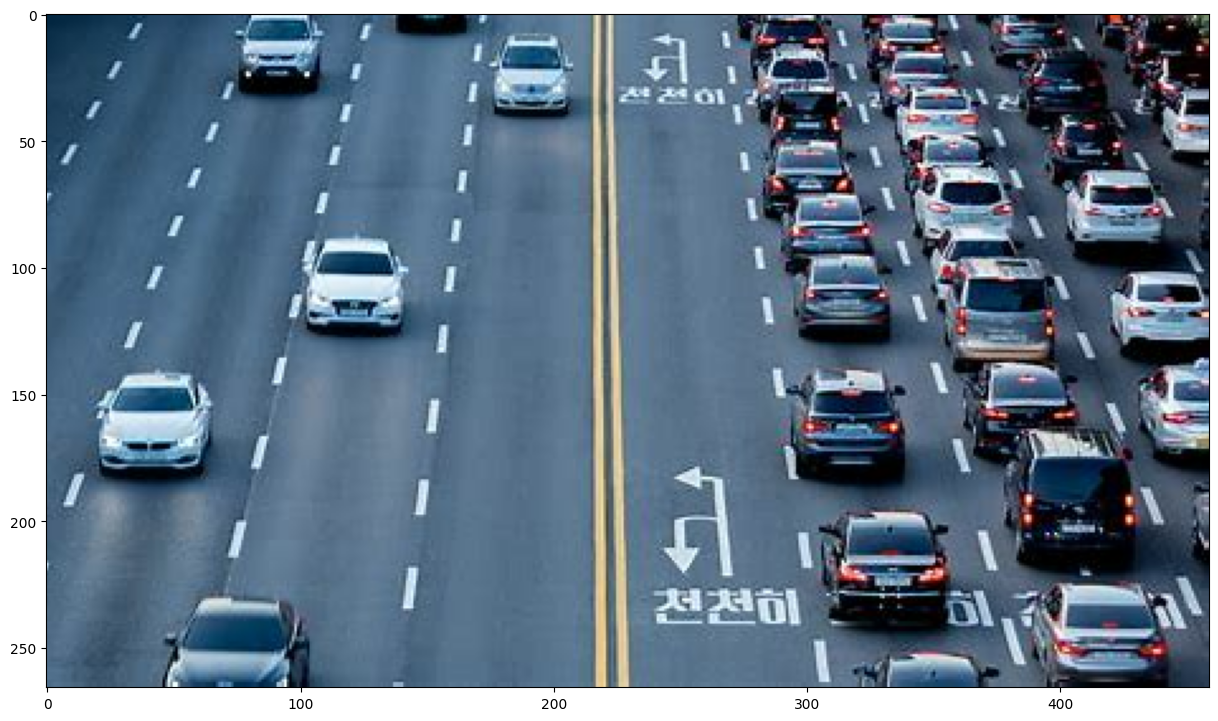

In [5]:
img_path = 'https://th.bing.com/th/id/OIP.5svjCLKu80YkdgQCb_88SwHaEK?w=310&h=180&c=7&r=0&o=5&dpr=1.5&pid=1.7'
img = tf.keras.utils.get_file(fname = 'doro', origin = img_path)
img = tf.io.read_file(img)  # 파일 객체를 string으로 변환
img = tf.image.decode_jpeg(img, channels = 3)  # 문자(string)를 숫자(unit8) 텐서로 변환
img = tf.image.convert_image_dtype(img, tf.float32)  # 0~1 범위로 정규화

import matplotlib.pylab as plt
plt.figure(figsize = (15,10))
plt.imshow(img)

In [6]:
img.shape

TensorShape([266, 459, 3])

In [7]:
img_input = tf.expand_dims(img, 0) # batch_size 추가. 4차원 텐서로 입력
img_input.shape

TensorShape([1, 266, 459, 3])

In [8]:
# TensorFlow Hub 에서 모델 가져오기 - FasterRCNN + lnceptionResNet V2
model = tfhub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")  

In [9]:
# 모델 시그니처(용도) 확인
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7F62B83DBA60>}))

In [10]:
# 객체 탐지 모델 생성
obj_detector = model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x7F62B83DBA60>

In [11]:
# 모델을 이용하여 예측 (추론)
result = obj_detector(img_input)
result.keys()

dict_keys(['detection_class_labels', 'detection_boxes', 'detection_scores', 'detection_class_names', 'detection_class_entities'])

In [12]:
#  탐지한 객체의 개수
len(result["detection_scores"])

100

In [13]:
type(result)

dict

In [14]:
for  key, value in result.items():
    print(key, value)

detection_class_labels tf.Tensor(
[571 571 571 571 571 571 571 571 571 571 571 571 594 571 571 571 571 571
 571 571 404 571 571 571 594 571 103 571 594 594 571 571 594 571 409 409
 409 103 594 571 594 409 103 409 571 409 594 409 594 103 571 571 571 103
 409 103 594 103 103 571 103 404 571 404 404 409 571 103 103 103 571 571
 103 103 103 103 103 594 409 103 571 103 404 103 409 103 594 404 409 103
 409 552 571 404 103 103 103 409 552 103], shape=(100,), dtype=int64)
detection_boxes tf.Tensor(
[[5.30811906e-01 3.98353003e-02 6.89354777e-01 1.42079353e-01]
 [8.40871036e-01 8.43521833e-01 9.95087147e-01 9.65668440e-01]
 [3.29208404e-01 2.16959298e-01 4.82201666e-01 3.09458494e-01]
 [4.76213172e-04 1.58689648e-01 1.22101709e-01 2.36260712e-01]
 [7.35069871e-01 6.69883072e-01 9.14067328e-01 7.80735195e-01]
 [3.58610749e-02 3.79010677e-01 1.57826439e-01 4.50360596e-01]
 [5.21809816e-01 6.33549571e-01 6.99224532e-01 7.42854595e-01]
 [3.79059672e-01 9.13451612e-01 5.13490260e-01 9.99347508e-01]


In [16]:
labels = result["detection_class_labels"]
names = result["detection_class_names"]

In [23]:
boxes = result["detection_boxes"]   # Bounding Box 좌표 예측
labels = result["detection_class_entities"]   # 클래스 값
scores = result["detection_scores"]   # 신뢰도 (confidence)

In [24]:
result["detection_scores"]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.96186554, 0.8611613 , 0.8404147 , 0.81241816, 0.8060637 ,
       0.7796618 , 0.7737049 , 0.7682317 , 0.72943133, 0.7267547 ,
       0.7088306 , 0.693766  , 0.64482564, 0.60690206, 0.60073316,
       0.5828626 , 0.57580566, 0.5690365 , 0.56217104, 0.37757668,
       0.36510852, 0.3436569 , 0.28968978, 0.2721999 , 0.24398465,
       0.24110053, 0.20976573, 0.20679086, 0.18802583, 0.17479147,
       0.172815  , 0.16471906, 0.16283913, 0.1616549 , 0.16153032,
       0.15945587, 0.15638949, 0.15313059, 0.15166284, 0.14704214,
       0.14296363, 0.13732828, 0.13537623, 0.13224615, 0.131443  ,
       0.12216477, 0.12158041, 0.12075449, 0.11765699, 0.11146091,
       0.11126172, 0.1106471 , 0.10704722, 0.10338778, 0.10251443,
       0.10224899, 0.1000822 , 0.09616656, 0.09513229, 0.09356933,
       0.08961067, 0.08960401, 0.08516776, 0.08511845, 0.07967202,
       0.07443291, 0.0737194 , 0.07165888, 0.07063024, 0.06976518,
       0.06725

In [19]:
result["detection_boxes"][0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5308119 , 0.0398353 , 0.6893548 , 0.14207935], dtype=float32)>

In [20]:
result["detection_class_entities"]

<tf.Tensor: shape=(100,), dtype=string, numpy=
array([b'Car', b'Car', b'Car', b'Car', b'Car', b'Car', b'Car', b'Car',
       b'Car', b'Car', b'Car', b'Car', b'Taxi', b'Car', b'Car', b'Car',
       b'Car', b'Car', b'Car', b'Car', b'Vehicle', b'Car', b'Car', b'Car',
       b'Taxi', b'Car', b'Land vehicle', b'Car', b'Taxi', b'Taxi', b'Car',
       b'Car', b'Taxi', b'Car', b'Wheel', b'Wheel', b'Wheel',
       b'Land vehicle', b'Taxi', b'Car', b'Taxi', b'Wheel',
       b'Land vehicle', b'Wheel', b'Car', b'Wheel', b'Taxi', b'Wheel',
       b'Taxi', b'Land vehicle', b'Car', b'Car', b'Car', b'Land vehicle',
       b'Wheel', b'Land vehicle', b'Taxi', b'Land vehicle',
       b'Land vehicle', b'Car', b'Land vehicle', b'Vehicle', b'Car',
       b'Vehicle', b'Vehicle', b'Wheel', b'Car', b'Land vehicle',
       b'Land vehicle', b'Land vehicle', b'Car', b'Car', b'Land vehicle',
       b'Land vehicle', b'Land vehicle', b'Land vehicle', b'Land vehicle',
       b'Taxi', b'Wheel', b'Land vehicle', b'Car'

In [25]:
# 샘플 이미지 가로 세로 크기
img_height, img_width = img.shape[0], img.shape[1]
# 탐지할 최대 객체의 갯수
obj_to_detect = 10
# 시각화
for i in range(min(obj_to_detect, boxes.shape[0])):
    if scores[i] >= 0.2:
        (ymax, xmin, ymin, xmax) = (boxes[i][0] * img_height, boxes[i][1] * img_width,
                                    boxes[i][2] * img_height, boxes[i][3] * img_width)
        print("{} : ({},{},{},{})".format(scores[i], ymax, xmin, ymin, xmax))

0.9618655443191528 : (141.1959686279297,18.28440284729004,183.36837768554688,65.21442413330078)
0.8611612915992737 : (223.67169189453125,387.176513671875,264.69317626953125,443.2418212890625)
0.8404147028923035 : (87.5694351196289,99.58432006835938,128.26564025878906,142.04144287109375)
0.8124181628227234 : (0.12667270004749298,72.83854675292969,32.47905349731445,108.44366455078125)
0.806063711643219 : (195.52857971191406,307.476318359375,243.14190673828125,358.3574523925781)
0.7796617746353149 : (9.539046287536621,173.9658966064453,41.981834411621094,206.71551513671875)
0.7737048864364624 : (138.80140686035156,290.79925537109375,185.9937286376953,340.9702453613281)
0.7682316899299622 : (100.82987213134766,419.2742919921875,136.58840942382812,458.70050048828125)
0.7294313311576843 : (167.84873962402344,379.94537353515625,220.2152099609375,430.9759216308594)
0.7267547249794006 : (137.88446044921875,429.1825256347656,178.55929565429688,459.0)


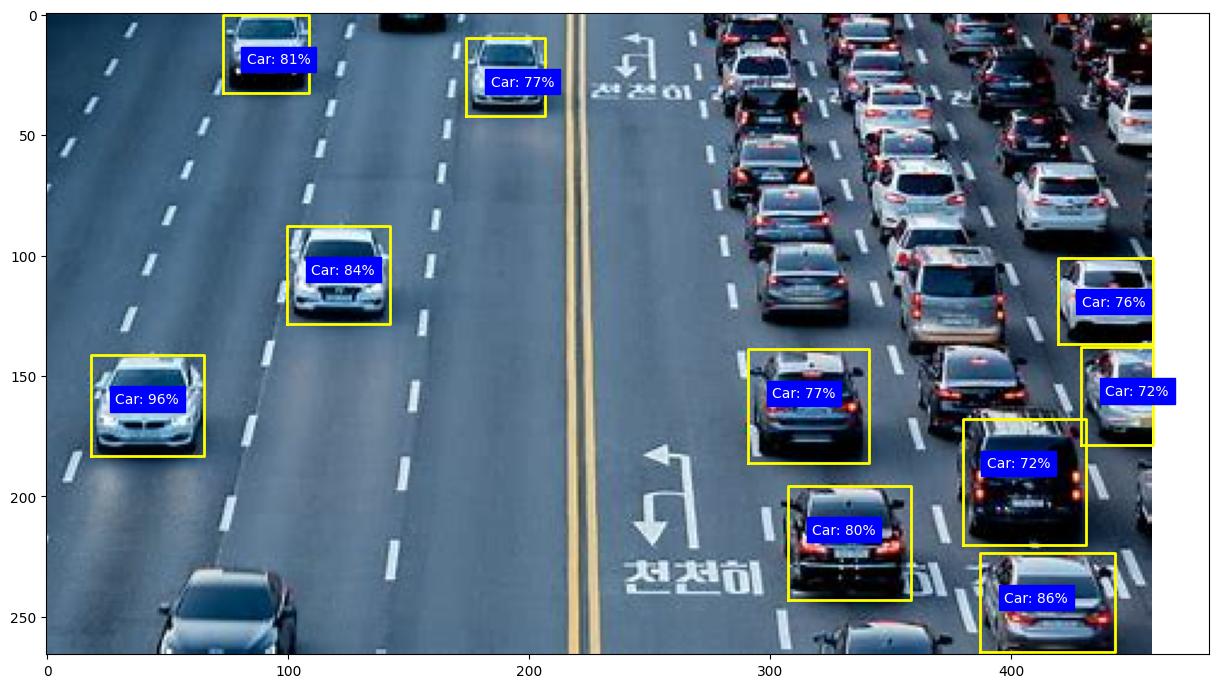

In [27]:
boxes = result["detection_boxes"]   # Bounding Box 좌표 예측
labels = result["detection_class_entities"]   # 클래스 값
scores = result["detection_scores"]   # 신뢰도 (confidence)

# 샘플 이미지 가로 세로 크기
img_height, img_width = img.shape[0], img.shape[1]

# 탐지할 최대 객체의 갯수
obj_to_detect = 10

plt.figure(figsize=(15, 10))
for i in range(min(obj_to_detect, boxes.shape[0])):
    if scores[i] >= 0.2:
        (ymax, xmin, ymin, xmax) = (boxes[i][0]*img_height, boxes[i][1]*img_width,
                                    boxes[i][2]*img_height, boxes[i][3]*img_width)
        plt.imshow(img)
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin],
                 color = 'yellow', linewidth = 2)
      
        class_name = labels[i].numpy().decode('utf-8')
        infer_score = int(scores[i].numpy() * 100)
        annotation = "{}: {}%". format(class_name, infer_score)
        plt.text(xmin + 10, ymax + 20, annotation,
                 color = 'white', backgroundcolor = 'blue', fontsize = 10)